In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load data preprocessing
df = joblib.load("../dataset/preprocessing_data/processed_data.pkl")
tfidf_vectorizer = joblib.load("../models/tfidf_vectorizer.pkl")

df.head()

,movie_id,title,overview,genres,keywords,cast,content
0,19995,Avatar,"['In', 'the', '22nd', 'century,', 'a', 'parapl...","['Action', 'Adventure', 'Fantasy', 'ScienceFic...","['cultureclash', 'future', 'spacewar', 'spacec...","['SamWorthington', 'ZoeSaldana', 'SigourneyWea...","['In', 'the', '22nd', 'century,', 'a', 'parapl..."
1,285,Pirates of the Caribbean: At World's End,"['Captain', 'Barbossa,', 'long', 'believed', '...","['Adventure', 'Fantasy', 'Action']","['ocean', 'drugabuse', 'exoticisland', 'eastin...","['JohnnyDepp', 'OrlandoBloom', 'KeiraKnightley']","['Captain', 'Barbossa,', 'long', 'believed', '..."
2,206647,Spectre,"['A', 'cryptic', 'message', 'from', 'Bond’s', ...","['Action', 'Adventure', 'Crime']","['spy', 'basedonnovel', 'secretagent', 'sequel...","['DanielCraig', 'ChristophWaltz', 'LéaSeydoux']","['A', 'cryptic', 'message', 'from', 'Bond’s', ..."
3,49026,The Dark Knight Rises,"['Following', 'the', 'death', 'of', 'District'...","['Action', 'Crime', 'Drama', 'Thriller']","['dccomics', 'crimefighter', 'terrorist', 'sec...","['ChristianBale', 'MichaelCaine', 'GaryOldman']","['Following', 'the', 'death', 'of', 'District'..."
4,49529,John Carter,"['John', 'Carter', 'is', 'a', 'war-weary,', 'f...","['Action', 'Adventure', 'ScienceFiction']","['basedonnovel', 'mars', 'medallion', 'spacetr...","['TaylorKitsch', 'LynnCollins', 'SamanthaMorton']","['John', 'Carter', 'is', 'a', 'war-weary,', 'f..."


In [3]:
# Transform data
tfidf_matrix = tfidf_vectorizer.transform(df['content'])

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(cosine_sim)

[[1.         0.01655915 0.00903772 ... 0.00364048 0.00396927 0.        ]
 [0.01655915 1.         0.01021336 ... 0.01285819 0.         0.        ]
 [0.00903772 0.01021336 1.         ... 0.01185048 0.         0.        ]
 ...
 [0.00364048 0.01285819 0.01185048 ... 1.         0.01864863 0.0221513 ]
 [0.00396927 0.         0.         ... 0.01864863 1.         0.01118907]
 [0.         0.         0.         ... 0.0221513  0.01118907 1.        ]]


In [4]:
# Simpan model cosine similarity
joblib.dump(cosine_sim, "../models/cosine_similarity.pkl")

['../models/cosine_similarity.pkl']

### Testing

In [5]:
def recommend_movies(title, df, cosine_sim, top_n=3):
    if title not in df['title'].values:
        return "Film tidak ditemukan dalam database."
    
    idx = df[df['title'] == title].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    recommended_movies = [(df.iloc[index]['title'], score) for index, score in similarity_scores]
    
    return recommended_movies

In [8]:
# Coba kalo kita nonton Interstellar
recommended = recommend_movies("Interstellar",df, cosine_sim)

### Visualisasi

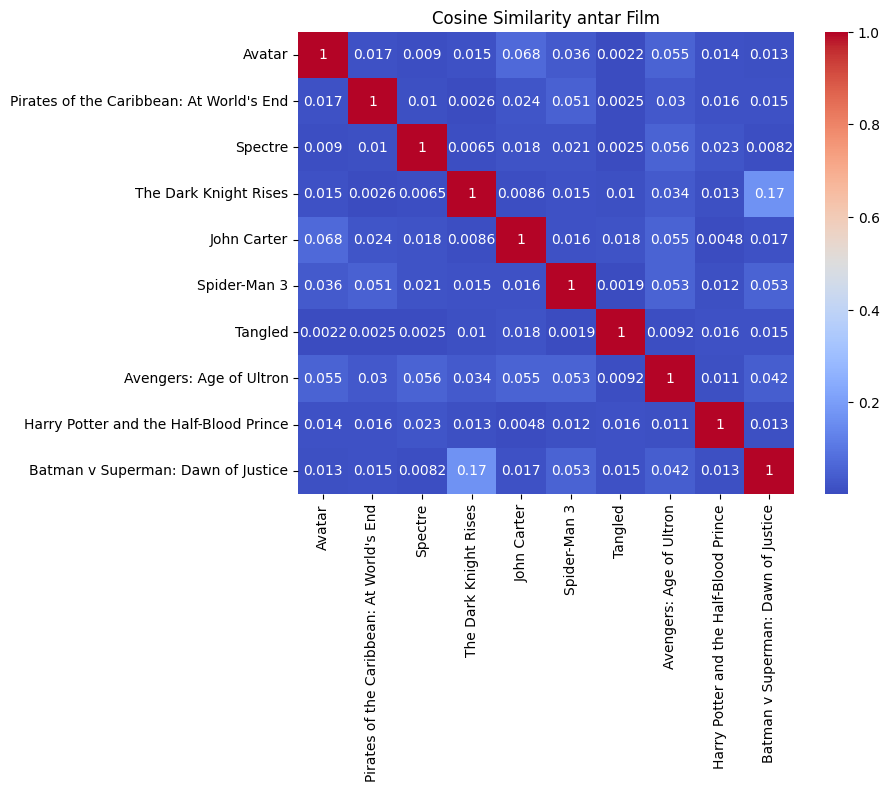

In [16]:
# 6️⃣ Visualisasi Heatmap Cosine Similarity
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim[:10, :10], annot=True, cmap="coolwarm", xticklabels=df['title'][:10], yticklabels=df['title'][:10])
plt.title("Cosine Similarity antar Film")
plt.show()

In [10]:
# 7️⃣ Visualisasi Rekomendasi Film
recommended_titles = [movie[0] for movie in recommended]
recommended_scores = [movie[1] for movie in recommended]

/tmp/ipykernel_245256/657661822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_scores, y=recommended_titles, palette="viridis")


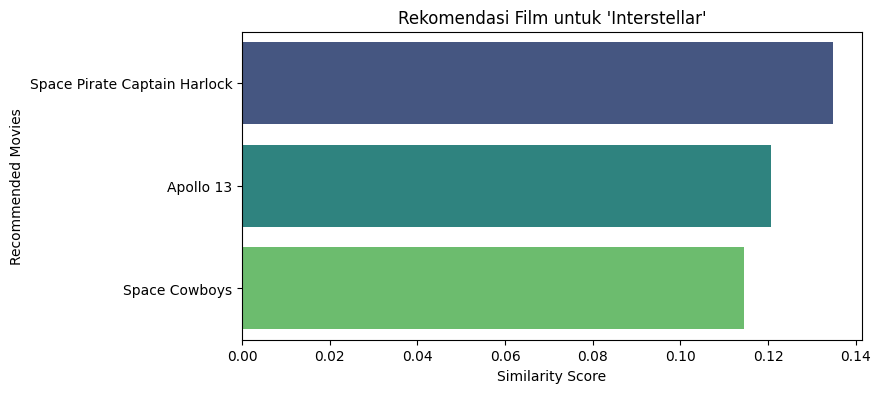

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(x=recommended_scores, y=recommended_titles, palette="viridis")
plt.xlabel("Similarity Score")
plt.ylabel("Recommended Movies")
plt.title(f"Rekomendasi Film untuk 'Interstellar'")
plt.show()

/tmp/ipykernel_245256/1897763334.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_scores, y=recommended_titles, palette="viridis", ax=axes[1])


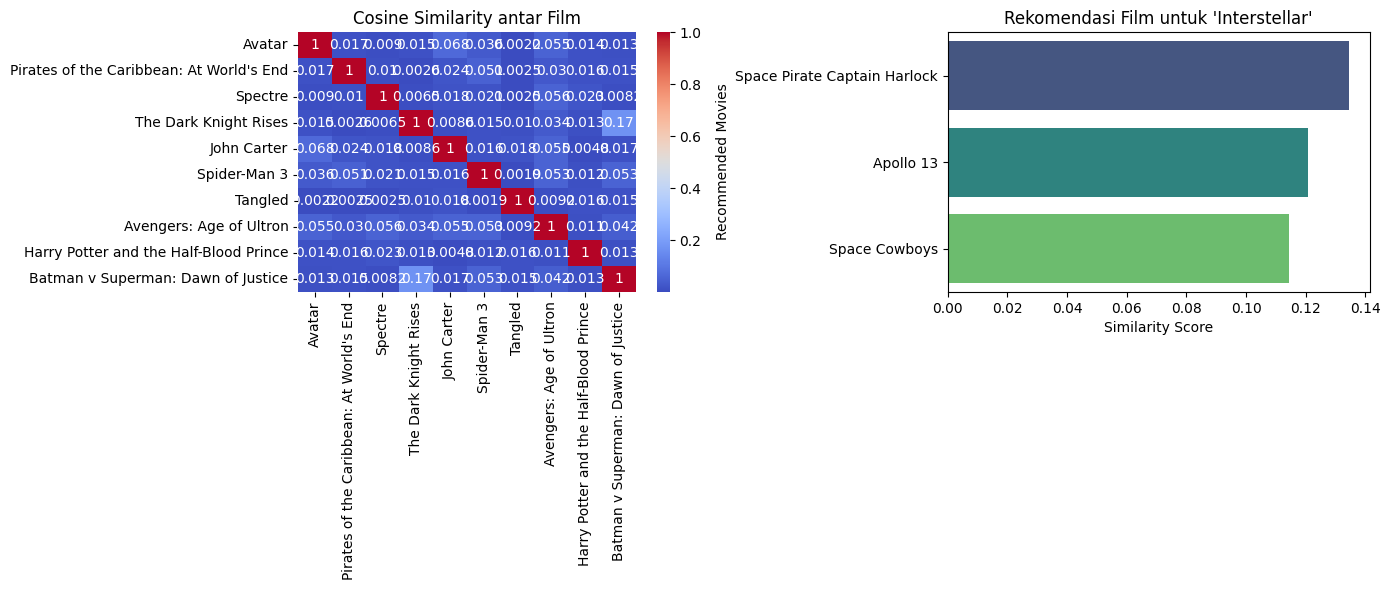

In [18]:
# Buat Figure untuk 2 Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 1. Plot Heatmap Cosine Similarity
sns.heatmap(cosine_sim[:10, :10], annot=True, cmap="coolwarm", xticklabels=df['title'][:10], yticklabels=df['title'][:10], ax=axes[0])
axes[0].set_title("Cosine Similarity antar Film")

# 🔹 2. Plot Barplot Rekomendasi Film
sns.barplot(x=recommended_scores, y=recommended_titles, palette="viridis", ax=axes[1])
axes[1].set_xlabel("Similarity Score")
axes[1].set_ylabel("Recommended Movies")
axes[1].set_title("Rekomendasi Film untuk 'Interstellar'")

# Tampilkan Plot
plt.tight_layout()
plt.show()